<a href="https://colab.research.google.com/github/Ajay0110/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

### Importing important libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Mount the drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Classification EDA Capstone Project/data_mobile_price_range.csv')

### To display all columns and rows

In [4]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Head and Tail of the dataset

In [5]:
# Displaying first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Displaying last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


### Getting the shape of the dataset

In [7]:
# Getting the shape of the dataset
df.shape

(2000, 21)

### Renaming the columns for better understanding

In [8]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','int_memory':'internal_memory','m_dep':'mobile_depth','mobile_wt':'mobile_weight','pc':'primary_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [9]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Checking datatypes and null values

In [10]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   bluetooth        2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   front_cam_pix    2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   internal_memory  2000 non-null   int64  
 7   mobile_depth     2000 non-null   float64
 8   mobile_weight    2000 non-null   int64  
 9   n_cores          2000 non-null   int64  
 10  primary_cam_pix  2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  screen_height    2000 non-null   int64  
 15  screen_width     2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

In [11]:
# Checking for null values
df.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_cam_pix      0
four_g             0
internal_memory    0
mobile_depth       0
mobile_weight      0
n_cores            0
primary_cam_pix    0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

### Describing the dataframe

In [12]:
# Using describe()
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking for outliers

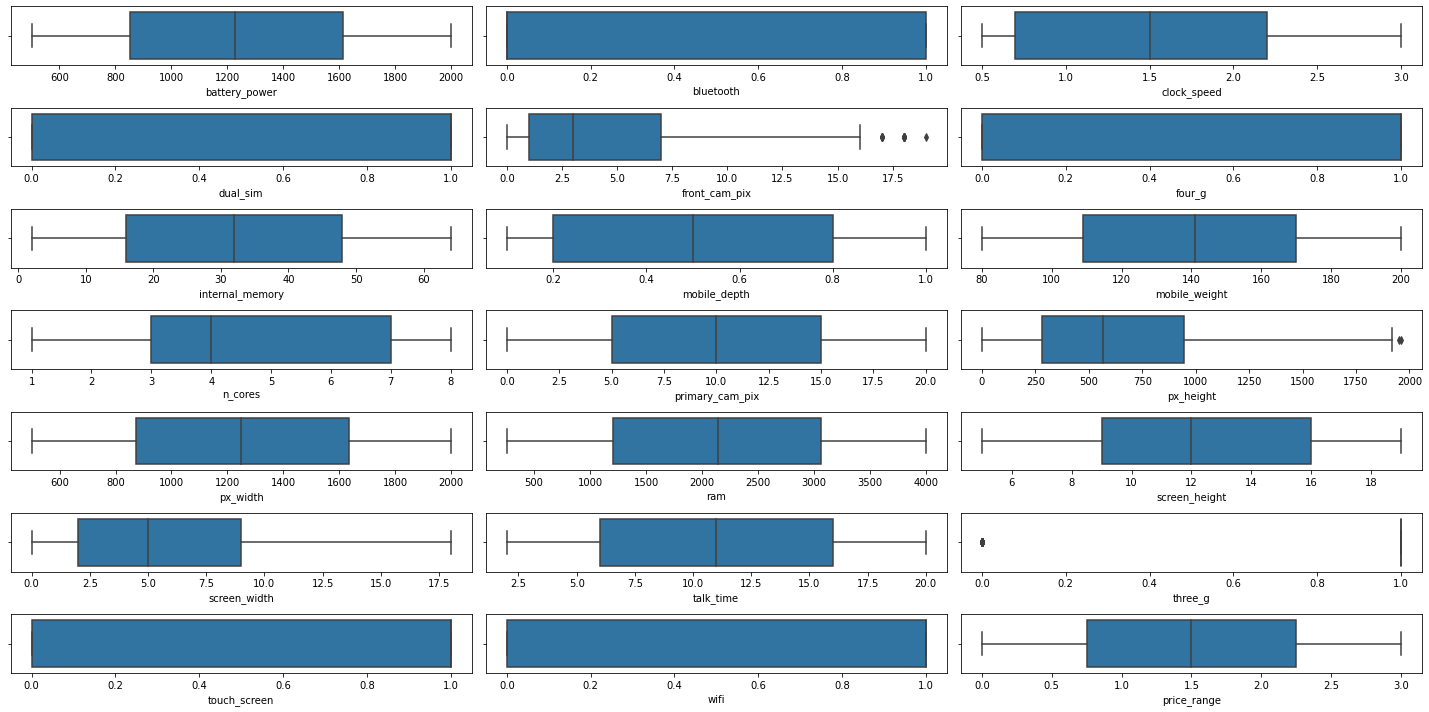

In [13]:
# Box plot to outlier check
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [14]:
# To find outliers
out_ls = ['front_cam_pix','px_height']
tot_outliers = 0
for col in out_ls:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  ls = df.index[(df[col] < lower) | (df[col] > upper)]
  print(f"Total outliers found in column {col} are {len(ls)}")
  tot_outliers = tot_outliers+len(ls)
print(f"The total outliers found are {tot_outliers}")
print(f"Total percentage of outliers: {(tot_outliers / len(df)*100)} %")

Total outliers found in column front_cam_pix are 18
Total outliers found in column px_height are 2
The total outliers found are 20
Total percentage of outliers: 1.0 %


### About 1% of outliers were found which if removed does not make much difference

# To handle zeroes in px_height and screen_width

In [15]:
# Getting rows that have px_height of value zero
df[df['px_height'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [16]:
# Getting rows that have px_width of value zero
df[df['screen_width'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690,804,2908,6,0,18,0,1,0,2
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322,547,470,7,0,15,1,1,0,0
73,1038,0,1.2,0,3,0,43,0.7,141,1,5,4,638,3709,11,0,12,1,1,1,3
86,1496,1,2.0,1,4,0,42,0.5,182,5,5,96,741,854,16,0,7,0,1,1,0
119,1778,0,0.5,0,0,0,15,0.5,102,3,0,1445,1954,1214,5,0,14,1,0,0,1


In [17]:
# Total number of rows that have 0 under screen_width column
print(f"Total zeroes in column screen_width is {len(df[df['screen_width'] == 0])}")

Total zeroes in column screen_width is 180


### Replacing zeros with mean of that particular column

In [18]:
# Columns that contain zero which dont make sense
zero = ['px_height', 'screen_width']
for col in zero:
  # Grouping with price_range
  print(f"The mean {col} for each {df.groupby('price_range')[col].mean()}")
  # Replacing zeroes with NaN
  df[col] = df[col].replace(0, np.nan)
  # Replacing NaN with mean
  df[col] = df[col].fillna(df.groupby('price_range')[col].transform('mean'))

The mean px_height for each price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64
The mean screen_width for each price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: screen_width, dtype: float64


In [19]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1


### Creating columns based on camera

In [20]:
# Creating new columns based on camera present
cam = ['front_cam_pix','primary_cam_pix']
for col in cam:
  df.loc[df[col] == 0, col+'_present'] = 0
  df.loc[df[col] > 0, col+'_present'] = 1

In [21]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0


### Display size is the hypotenuse of the phone which can be derived using pythagoras theorem where screen height and width is already given. 

In [22]:
# Getting Display size in inches using pythagoras theorem
df['display_size'] = ((np.sqrt(df['screen_height']**2 + df['screen_width']**2)/2.54)).round(2)

In [23]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0,3.25


In [24]:
# Dropping screen height and width
df.drop(columns = ['screen_height', 'screen_width'], inplace = True)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25


### Creating a new column based on slim attributes of the mobile where depth must be less than 0.7 cm and mobile weight less than 140 grams also it has to be touch screen.

In [25]:
# Getting slim phones
df.loc[(df['mobile_depth'] < 0.7) & (df['mobile_weight'] < 140) & (df['touch_screen'] == 1), 'slim'] = '1'

In [26]:
# Replacing NaN with zeros
df['slim'].value_counts()
df['slim'].fillna(0, inplace = True)

In [27]:
# Getting the value count of the column slim
df['slim'].value_counts()

0    1670
1     330
Name: slim, dtype: int64

In [28]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0


### Creating a column called screen_type where 1 means 'HD' and 0 means 'Not HD'

In [29]:
# Getting screen types hd or not hd
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_type'] = '0'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_type'] = '1'

# Binning columns for better EDA

### Binning RAM into group of RAM sizes

In [30]:
# Creating a binned RAM size
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ram_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,2 to 3 GB
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,2 to 3 GB
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,2 to 3 GB
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,2 to 3 GB
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,1 to 2 GB


### Binning Clock Speed into groups of speed

In [31]:
# Creating a binned clock speed
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']
df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ram_size,speed
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,2 to 3 GB,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,2 to 3 GB,upto 1GHz
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,2 to 3 GB,upto 1GHz
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,2 to 3 GB,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,1 to 2 GB,upto 1.5GHz


### Binning camera pixels

In [32]:
# Creating a binned primary camera
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}
df['primary_camera'] = pd.cut(df['primary_cam_pix'], bins = bin_camera, labels = bin_camera_label)
df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['primary_cam_pix'].map(camera_dict))
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ram_size,speed,primary_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,2 to 3 GB,upto 2.5GHz,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,2 to 3 GB,upto 1GHz,upto 8MP
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,2 to 3 GB,upto 1GHz,upto 8MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,2 to 3 GB,upto 2.5GHz,upto 12MP
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,1 to 2 GB,upto 1.5GHz,upto 16MP


In [33]:
# Creating a binned front camera
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}
df['front_camera'] = pd.cut(df['front_cam_pix'], bins = bin_camera, labels = bin_camera_label)
df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['front_cam_pix'].map(camera_dict))
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ram_size,speed,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,2 to 3 GB,upto 2.5GHz,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,2 to 3 GB,upto 1GHz,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,2 to 3 GB,upto 1GHz,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,2 to 3 GB,upto 2.5GHz,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,1 to 2 GB,upto 1.5GHz,upto 16MP,upto 16MP


### Converting RAM from MB to GB

In [34]:
def ram(rm):
  return round(rm/1024,3)

In [35]:
df['ram'] = df['ram'].apply(ram)

In [36]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ram_size,speed,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2.489,19,0,0,1,1,1.0,1.0,4.49,0,0,2 to 3 GB,upto 2.5GHz,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2.569,7,1,1,0,2,0.0,1.0,6.80,0,1,2 to 3 GB,upto 1GHz,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2.542,9,1,1,0,2,1.0,1.0,4.40,0,1,2 to 3 GB,upto 1GHz,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2.704,11,1,0,0,2,0.0,1.0,7.04,0,1,2 to 3 GB,upto 2.5GHz,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1.378,15,1,1,0,1,1.0,1.0,3.25,0,1,1 to 2 GB,upto 1.5GHz,upto 16MP,upto 16MP


# Univariate Analysis

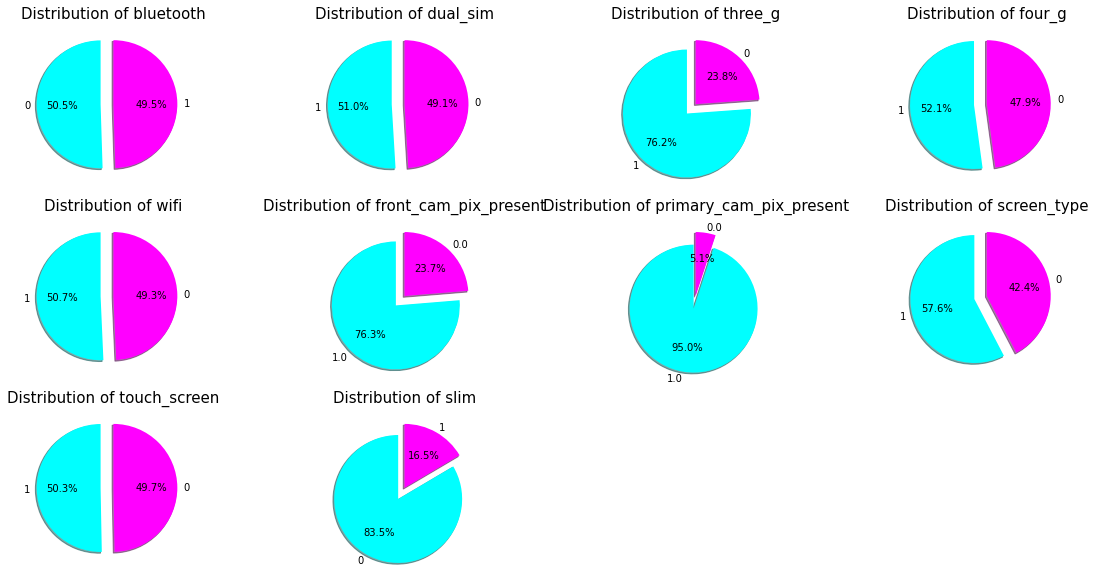

In [37]:
# Initializing count variable
count = 0
# Setting fig size
plt.figure(figsize=(20,10))
# List containing binary columns
binary_cols = ['bluetooth','dual_sim','three_g','four_g','wifi','front_cam_pix_present','primary_cam_pix_present','screen_type','touch_screen','slim']
# Pie plot for all the binary columns
for i in binary_cols:
    myexplode = [0.2, 0]
    colors = ['cyan','magenta','black']    
    labels = df[i].value_counts().index
    sizes = df[i].value_counts().values      
    plt.subplot(3,4,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    plt.title(f'Distribution of {binary_cols[count]}', color = 'black',fontsize = 15)
    count += 1


### Analysis

*   We have bluetooth, dual_sim, wifi and touch_screen with almost 50-50 distribution
*   Front camera is 76% available, whereas primary is 95%. 

*   Also we have almost 58% of the data containing HD screen_type
*   Based on weight and depth, slim variable is derived which is 16.5% i.e, mobiles with slim attribute. 

*   Distribution of 4G technology is less when compared to 3G, this is some pretty old dataset.








In [38]:
# Getting remaining columns
cols = set(df.columns) - set(binary_cols)
cols

{'battery_power',
 'clock_speed',
 'display_size',
 'front_cam_pix',
 'front_camera',
 'internal_memory',
 'mobile_depth',
 'mobile_weight',
 'n_cores',
 'price_range',
 'primary_cam_pix',
 'primary_camera',
 'px_height',
 'px_width',
 'ram',
 'ram_size',
 'speed',
 'talk_time'}

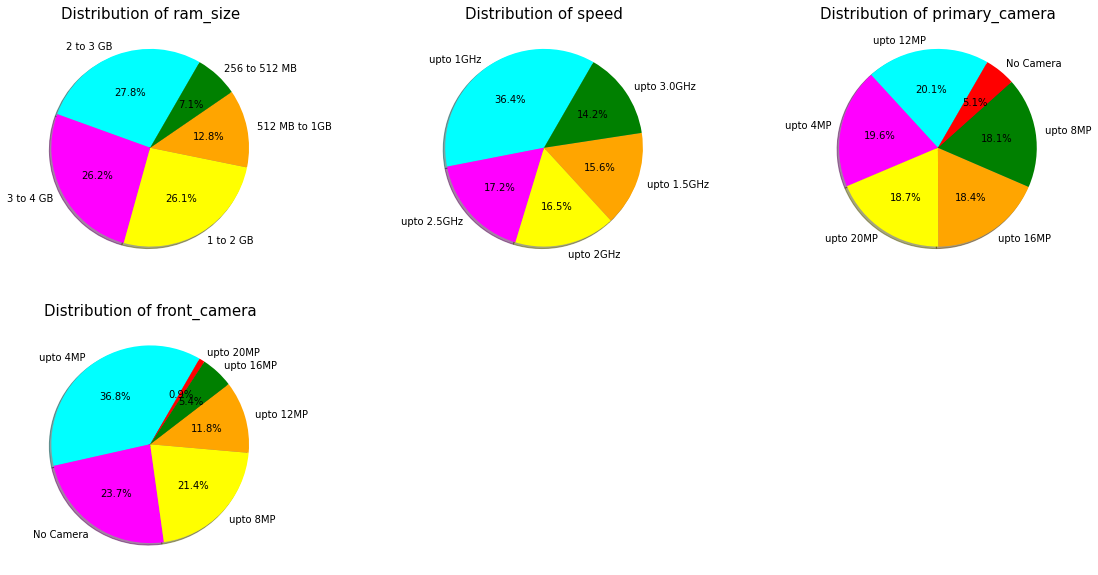

In [78]:
# Pie plot for categorical variables.
count = 0
plt.figure(figsize=(20,10))
cat_var = ['ram_size', 'speed', 'primary_camera', 'front_camera']
for i in cat_var:
  myexplode = [0.2, 0]
  colors = ['cyan','magenta','yellow','orange','green',	'red']    
  labels = df[i].value_counts().index
  sizes = df[i].value_counts().values      
  plt.subplot(2,3,count+1)
  plt.pie(sizes, labels=labels, shadow = True, startangle=60, colors=colors, autopct='%1.1f%%')
  plt.title(f'Distribution of {cat_var[count]}', color = 'black',fontsize = 15)
  count += 1

### Analysis

*   From ram_size it is seen that most mobiles have 2 to 4 GB RAM, and lower RAM represent a mobile with basic features. Higher the RAM, higher the quality of fetching and processing data and higher the features of the mobile.
*   From speed, we can see that most of the mobiles have clock_speed upto 1 GHz, which constitutes the basic mobiles. For smartphones the clock speed starts anywhere from 1 GHz like Helio processor upto 3 GHz like snap dragon.


*   Primary camera is the rear camera, which is the very first appearance of cameras in mobiles. Here a small percentage has no camera.
*   Front camera started making it's appearance as selfie camera in 2010 and around 36% has pixels upto 4 MP and almost 1% have pixels upto 20 MP.





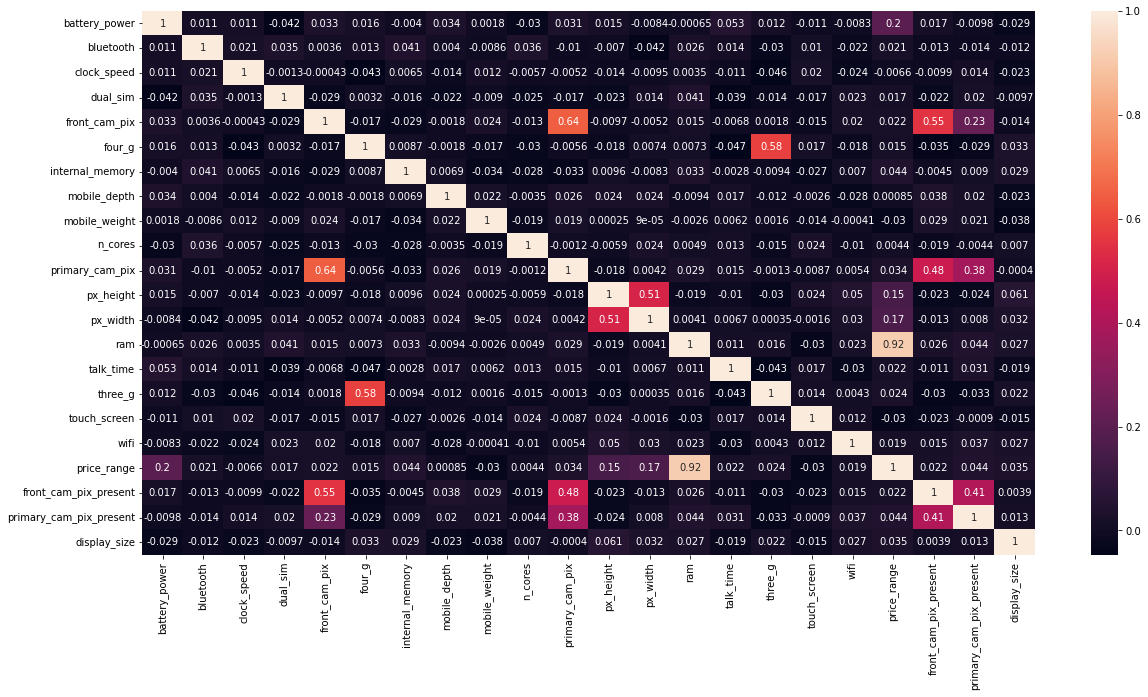

In [56]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [40]:
corr = df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range                1.000000
ram                        0.917045
battery_power              0.200723
px_width                   0.165818
px_height                  0.149806
internal_memory            0.044435
primary_cam_pix_present    0.043910
display_size               0.034804
primary_cam_pix            0.033599
three_g                    0.023611
front_cam_pix_present      0.022085
front_cam_pix              0.021998
talk_time                  0.021859
bluetooth                  0.020573
wifi                       0.018785
dual_sim                   0.017444
four_g                     0.014772
n_cores                    0.004399
mobile_depth               0.000853
clock_speed               -0.006606
mobile_weight             -0.030302
touch_screen              -0.030411
Name: price_range, dtype: float64

In [41]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_cam_pix', 'four_g', 'internal_memory', 'mobile_depth',
       'mobile_weight', 'n_cores', 'primary_cam_pix', 'px_height', 'px_width',
       'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range',
       'front_cam_pix_present', 'primary_cam_pix_present', 'display_size',
       'slim', 'screen_type', 'ram_size', 'speed', 'primary_camera',
       'front_camera'],
      dtype='object')

In [42]:
def price_plot(df,col):
  count = 0
  i = 0
  plt.figure(figsize = (15,15))
  while True:
    df_price = df[df['price_range']==i]
    plt.subplot(2,2,count+1)
    sns.distplot(df_price[col])
    plt.title(f'{col} distribution of price range {i}')
    i += 1
    count+=1
    if i == 4:
      break

### RAM distribution based on price range

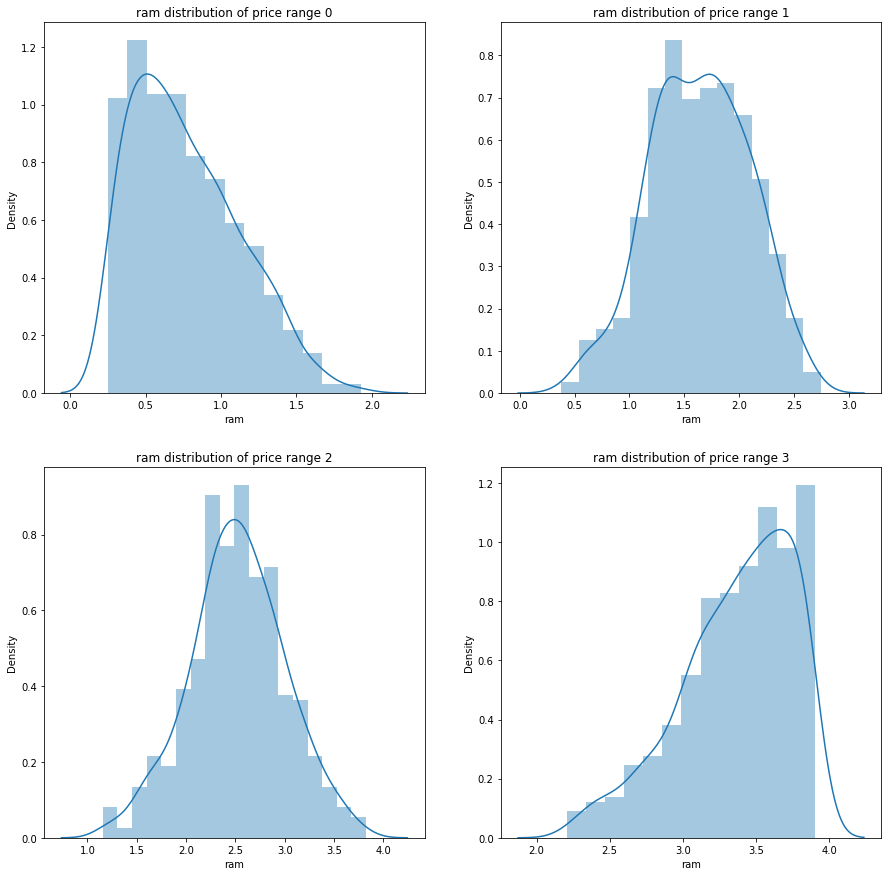

In [43]:
price_plot(df,'ram')

### Battery Power based on price range

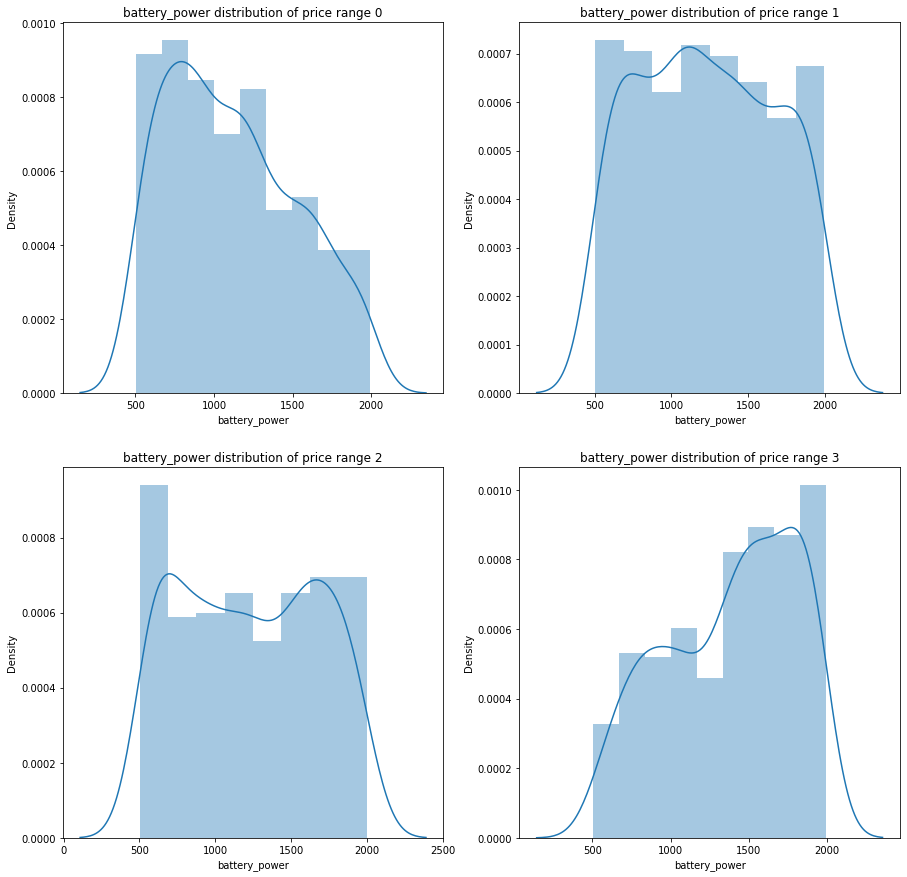

In [44]:
price_plot(df,'battery_power')

### Internal Memory based on price range

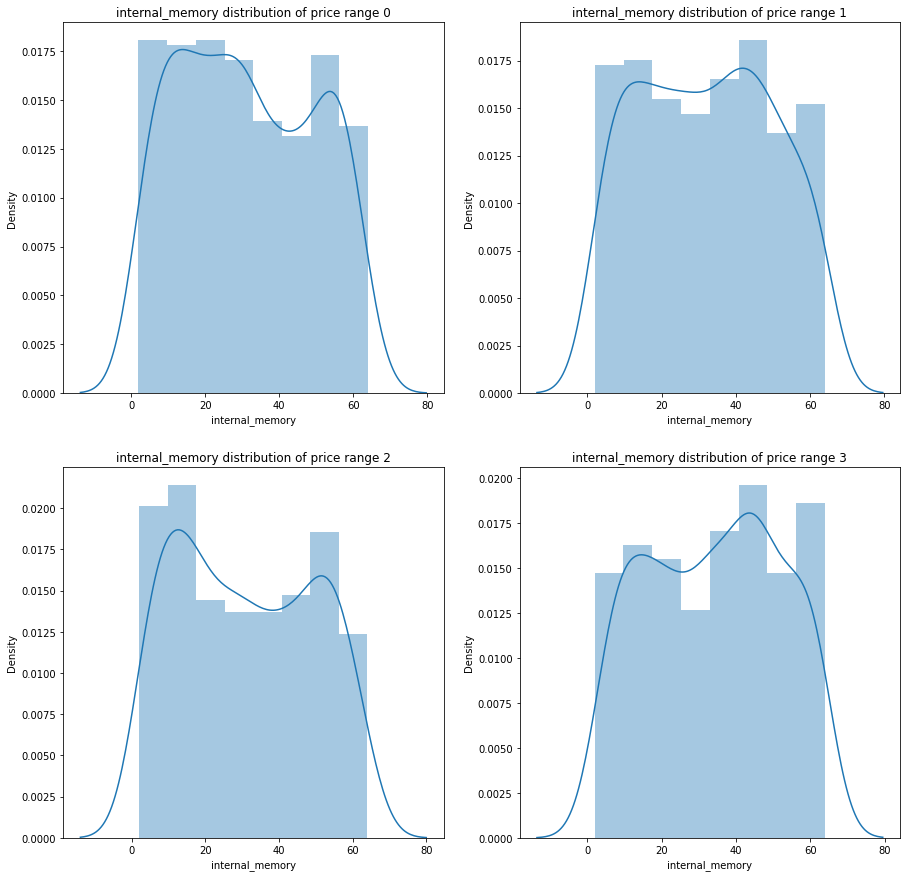

In [45]:
price_plot(df,'internal_memory')

### Number of cores based on price range

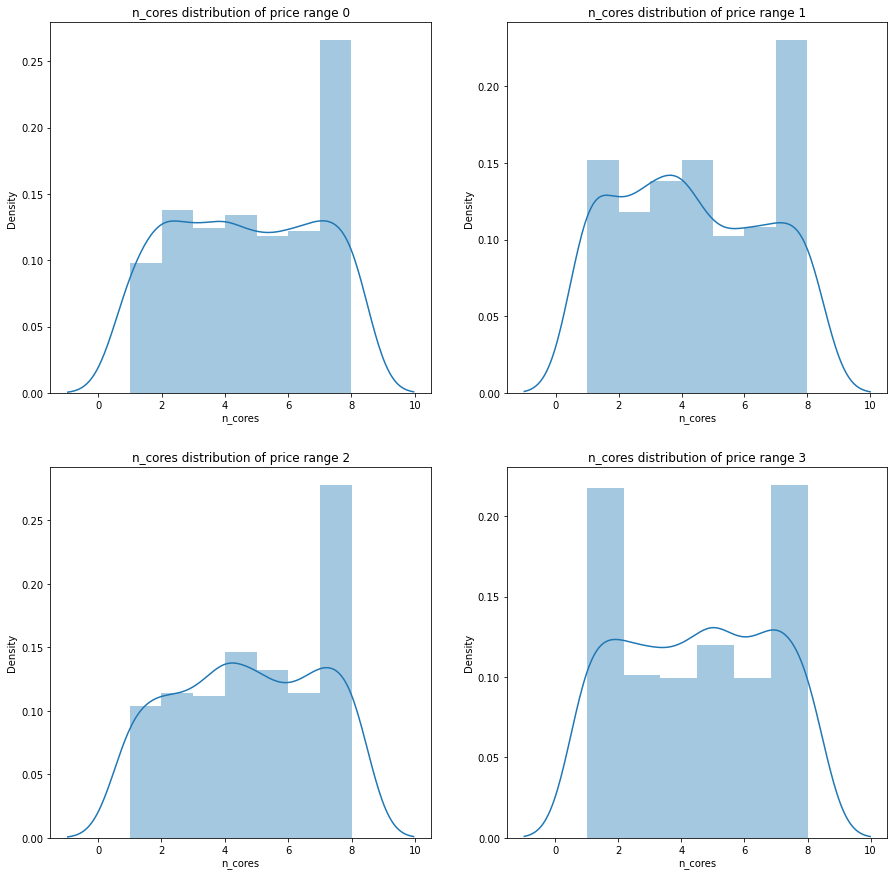

In [46]:
price_plot(df,'n_cores')

### Talk Time based on price range

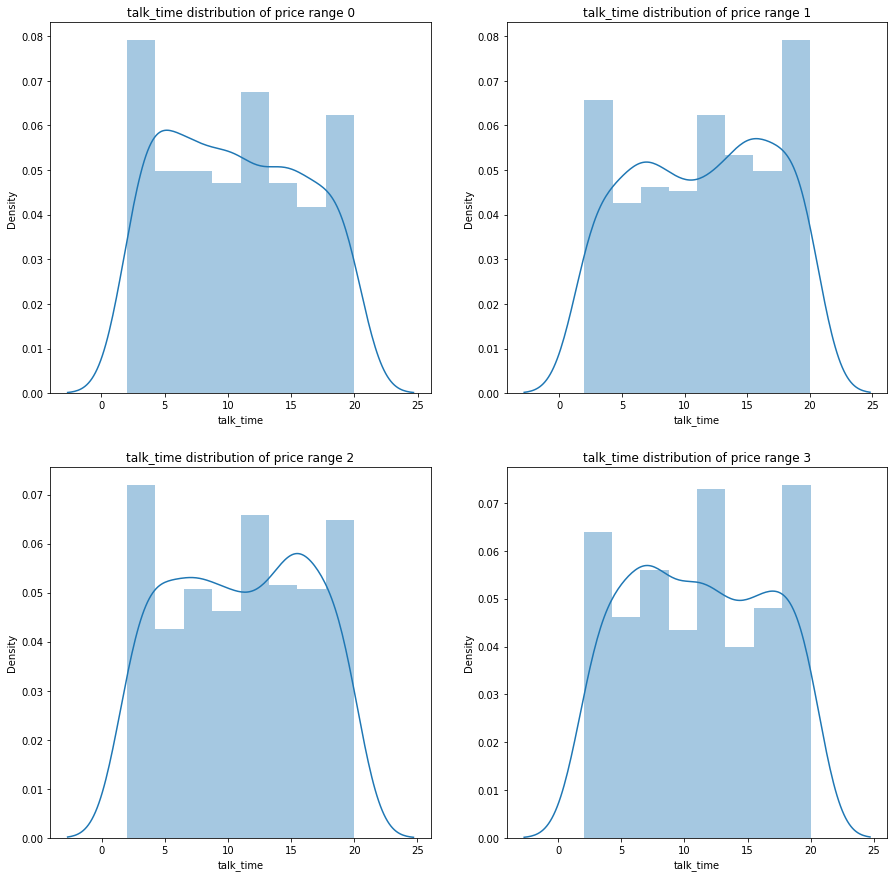

In [47]:
price_plot(df,'talk_time')

### Pixel width distribution based on price range

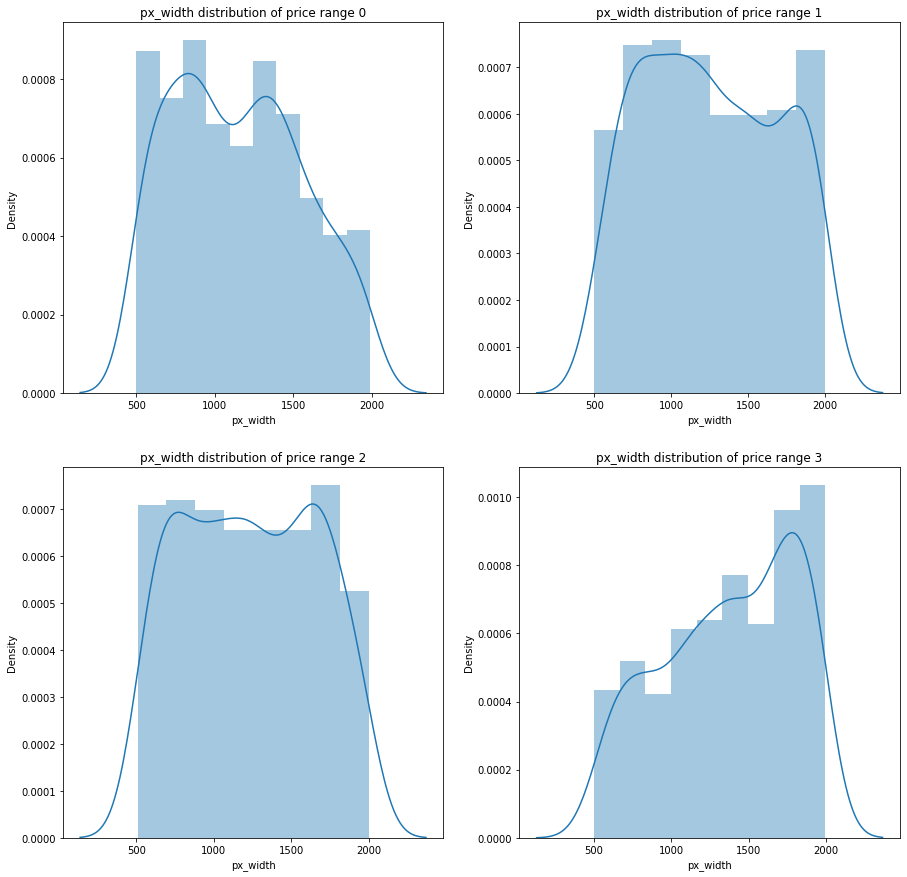

In [48]:
price_plot(df,'px_width')

### Pixel height distribution based on price range

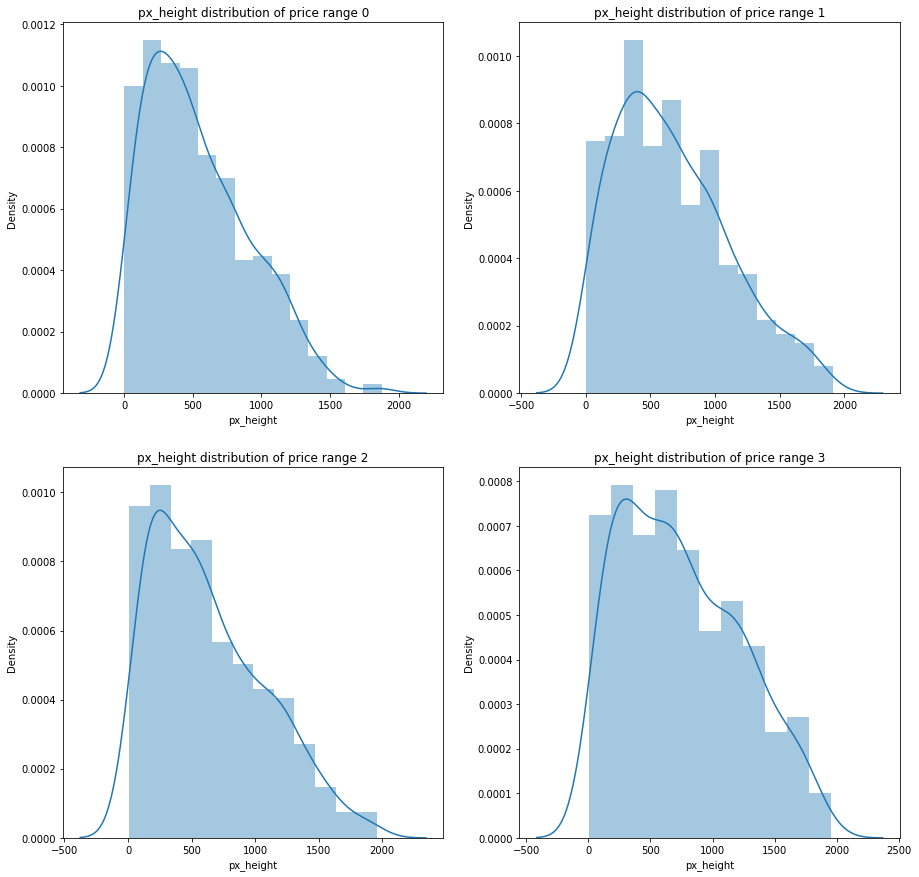

In [49]:
price_plot(df,'px_height')

### 3G countplot based on price range

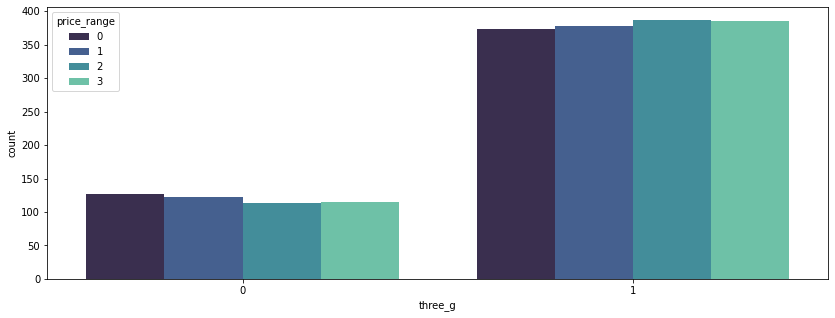

In [50]:
plt.figure(figsize = (14, 5))
sns.countplot(df['three_g'], palette = 'mako', hue = df['price_range'])

### 4G countplot based on price range

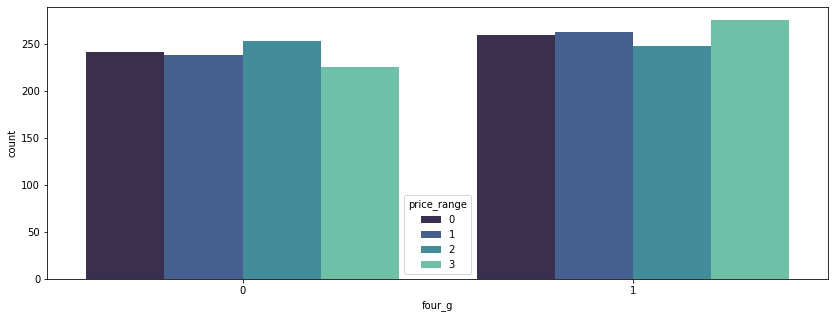

In [51]:
plt.figure(figsize = (14, 5))
sns.countplot(df['four_g'], palette = 'mako', hue = df['price_range'])

# Bivariate Analysis

### RAM size v/s Price Range

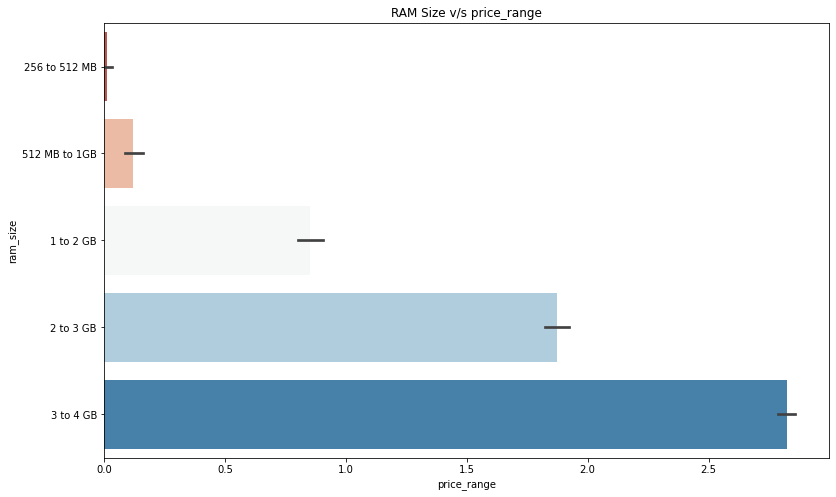

In [79]:
  # Bar plot for ram_size v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("RAM Size v/s price_range")
  sns.barplot(df['price_range'],df['ram_size'], palette = 'RdBu')



*   The price range increases as RAM increase.
*   It appears that RAMs in the range of 3 to 4 GB is available at all price ranges.

*   Upto 1 GB there are very small number of mobiles, these may be basic mobiles.





### Battery Power v/s Price Range

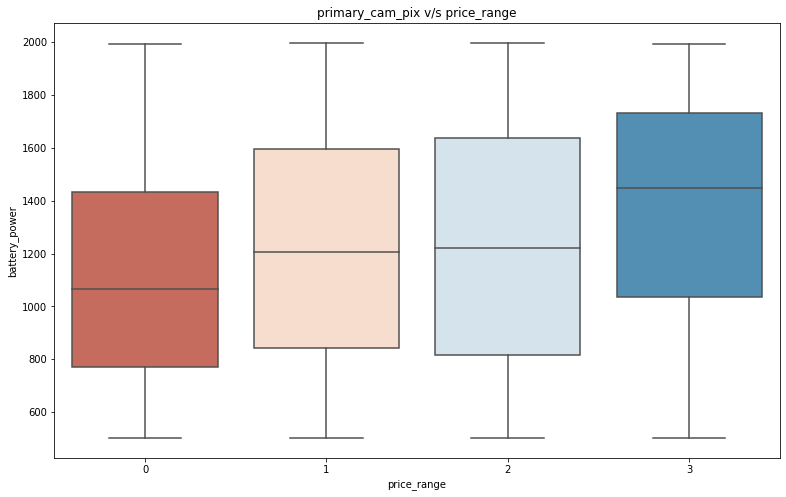

In [81]:
# Box plot for battery_power v/s price_range
plt.figure(figsize = (13, 8))
plt.title(col+" v/s price_range")
sns.boxplot(df['price_range'],df['battery_power'], palette = 'RdBu')



*   As the price range increases the battery range too increases.
*   Under price range 0, most of the mobiles have battery ranging from 800 to 1.4 mAh
*  Under price range 1, most of the mobiles have battery ranging around 900 to 1.58 mAh
*  Under price range 2, most of the mobiles have battery ranging from 800 to 1.6 mAh
*  Under price range 3, most of the mobiles have battery ranging around 1 mAh to 1.7 mAh





### Cores v/s Price Range

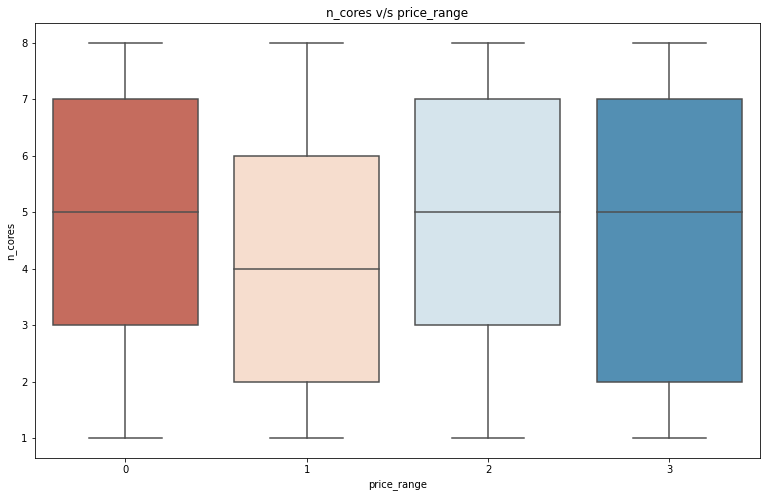

In [54]:
  # Box plot for n_cores v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("n_cores v/s price_range")
  sns.boxplot(df['price_range'],df['n_cores'], palette = 'RdBu')

*   As the price range increases, the number of mobiles with multiple cores increases.
*   Under price range 0, most of the mobiles have cores ranging from 3 to 7
*   Under price range 1, most of the mobiles have cores ranging from 2 to 6
*   Under price range 2, most of the mobiles have cores ranging from 3 to 7
*   Under price range 3, most of the mobiles have cores ranging from 2 to 7.
*   Higher price range with low cores signifies it has other better specs that leads to this price.




### Primary camera pixels v/s Price Range

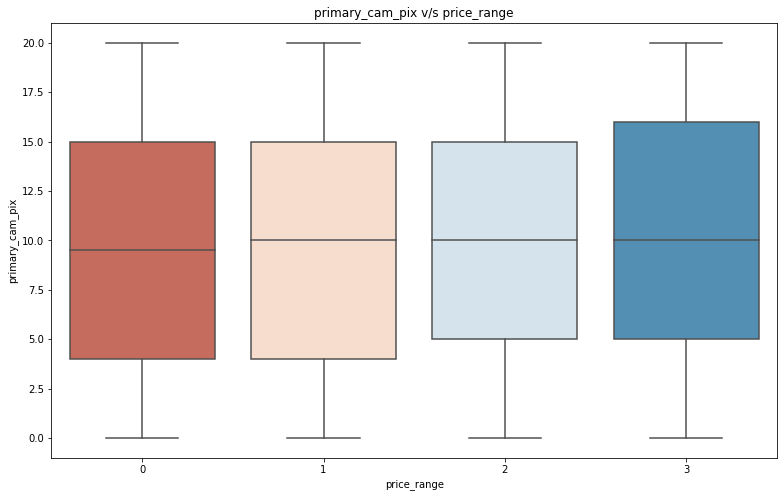

In [55]:
  # Box plot for primary_cam_pix v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['primary_cam_pix'], palette = 'RdBu')

*   As price range increases the pixels too increase.
*   Mobiles under price range 0 have pixel range from 4 to 15 MP, which is better but still other specs might be low like RAM, internal memory etc.
*   Higher the price range better pixels with better specs.



### Front Camera Pixels v/s Price Range

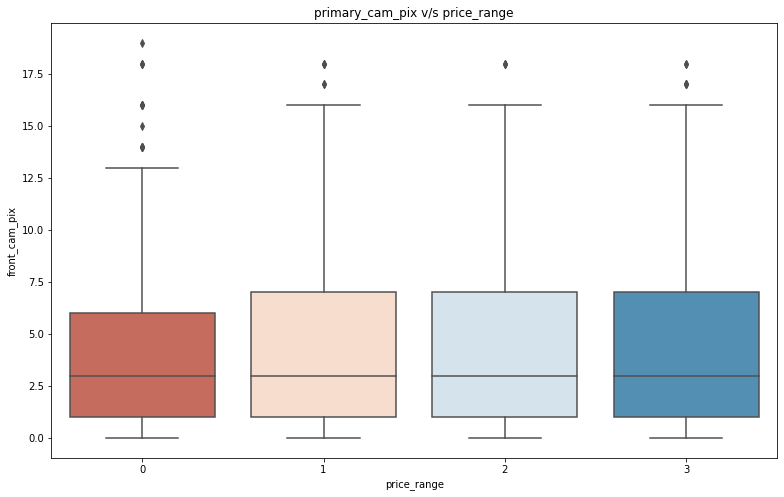

In [80]:
  # Box plot for front_cam_pix v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['front_cam_pix'], palette = 'RdBu')

*   There are outliers present in all price range.
*   As usual lower price range having higher pixel rate might have other low quality specs. Reverse is also true.



### Internal Memory v/s Price Range

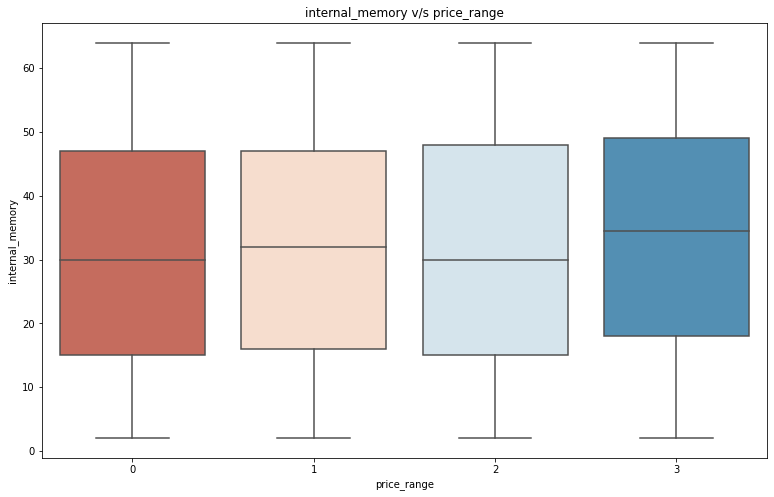

In [84]:
  # Box plot for internal_memory v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("internal_memory v/s price_range")
  sns.boxplot(df['price_range'],df['internal_memory'], palette = 'RdBu')

*  From the plot, it is seen that most of the mobiles have same internal memory size for all price ranges, little higher internal memory incase of higher price range.



### Display size v/s Price Range

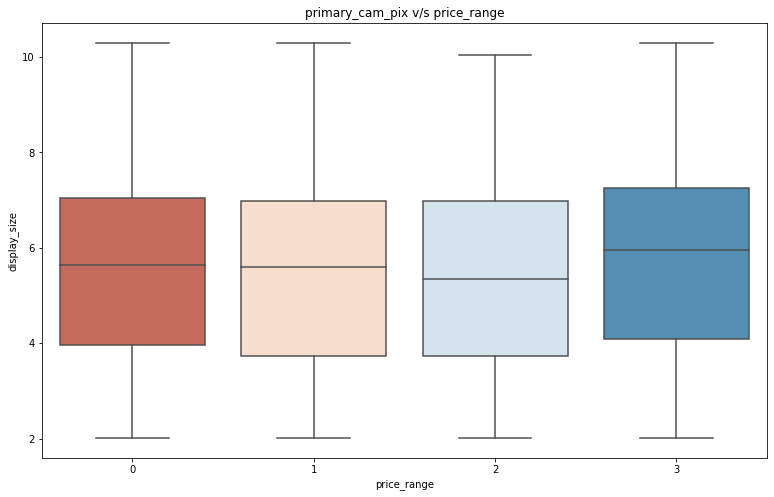

In [83]:
  # Box plot for display_size v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['display_size'], palette = 'RdBu')

*   From the plot, it is seen that most of the mobiles have same display size for all price ranges, little higher display size incase of higher price range.



# Multivariate Analysis

## Price Range, Battery Power and RAM Size

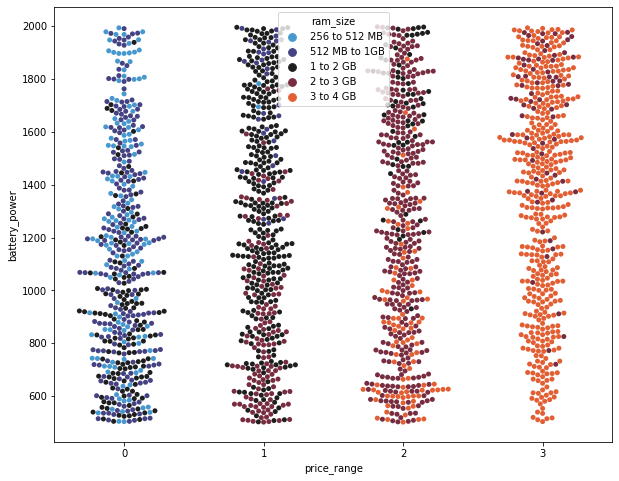

In [99]:
# Swarmplot using price_range, battery_power and ram_size variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'icefire')

1.   Most mobiles under the price range 0 have RAM size ranging from 256MB to 1 GB and have battery upto 1100 mAh. Very small numbers have battery upto 2000 mAh.
2.   Most mobiles under the price range 1 have RAM size ranging from 1GB to 3GB and have battery upto 2000 mAh.
1.   Price range 3 mobiles have RAM size ranging from 3GB to 4 GB and have battery upto 2000 mAh.




### Price Range, Processor cores and Clock speed

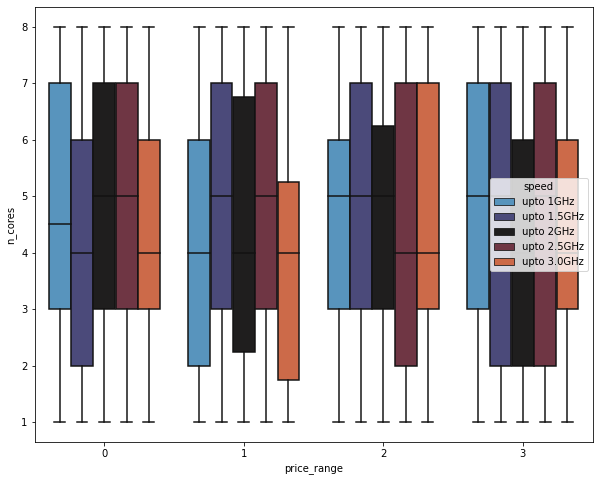

In [116]:
# Swarmplot using price_range, RAM and speed variables
plt.figure(figsize = (10, 8))
sns.boxplot(df['price_range'], df['n_cores'], hue = df['speed'], palette = 'icefire')

### Price Range, Display Size and Front Camera

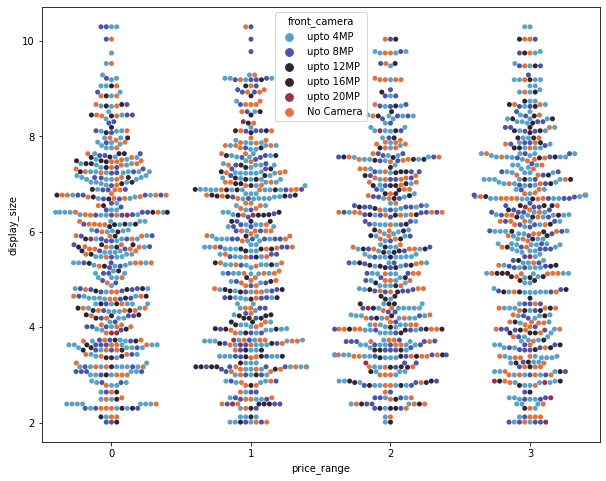

In [107]:
# Swarmplot using price_range, display_size and front_camera variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['display_size'], hue = df['front_camera'], palette = 'icefire')

### Price Range, Display Size and Primary Camera

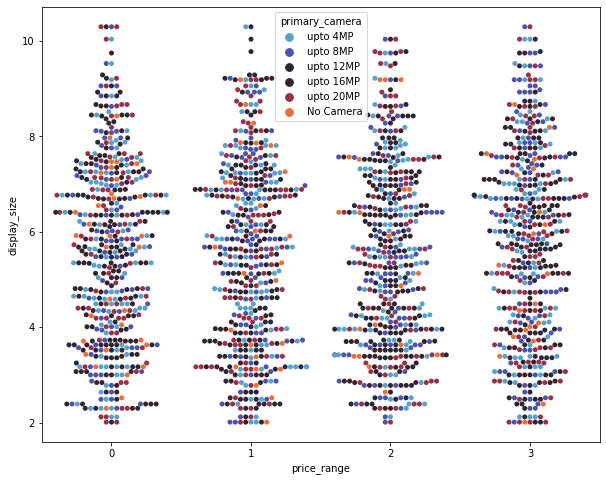

In [108]:
# Swarmplot using price_range, display_size and primary_camera variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['display_size'], hue = df['primary_camera'], palette = 'icefire')

In [57]:
# Dropping categorical varibles
cols = list(set(df.columns) - {'ram_size','speed','primary_camera','front_camera'})
cols

['front_cam_pix',
 'price_range',
 'four_g',
 'mobile_weight',
 'px_width',
 'bluetooth',
 'clock_speed',
 'slim',
 'internal_memory',
 'ram',
 'display_size',
 'wifi',
 'battery_power',
 'mobile_depth',
 'screen_type',
 'px_height',
 'primary_cam_pix',
 'n_cores',
 'primary_cam_pix_present',
 'dual_sim',
 'three_g',
 'talk_time',
 'front_cam_pix_present',
 'touch_screen']

In [208]:
x = df[cols]
y = df['price_range']

In [210]:
x.head()

,front_cam_pix,price_range,four_g,mobile_weight,px_width,bluetooth,clock_speed,slim,internal_memory,ram,display_size,wifi,battery_power,mobile_depth,screen_type,px_height,primary_cam_pix,n_cores,primary_cam_pix_present,dual_sim,three_g,talk_time,front_cam_pix_present,touch_screen
0,1,1,0,188,756,0,2.2,0,7,2.489,4.49,1,842,0.6,0,20.0,2,2,1.0,0,0,19,1.0,0
1,0,2,1,136,1988,1,0.5,0,53,2.569,6.80,0,1021,0.7,1,905.0,6,3,1.0,1,1,7,0.0,1
2,2,2,1,145,1716,1,0.5,0,41,2.542,4.40,0,563,0.9,1,1263.0,6,5,1.0,1,1,9,1.0,1
3,0,2,0,131,1786,1,2.5,0,10,2.704,7.04,0,615,0.8,1,1216.0,9,6,1.0,0,1,11,0.0,0
4,13,1,1,141,1212,1,1.2,0,44,1.378,3.25,0,1821,0.6,1,1208.0,14,2,1.0,0,1,15,1.0,1


In [211]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 24)
(400, 24)


### Model Implementation

In [219]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
%matplotlib inline

In [220]:
clf = LogisticRegression(multi_class='ovr',fit_intercept=True, random_state=0, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', random_state=0)

In [221]:
clf.coef_

array([[-1.44351022e-02, -5.95839173e+00, -6.96254813e-03,
         2.55606718e-03, -1.23530830e-03, -4.99685409e-02,
         5.33152335e-02,  9.11794360e-03, -2.68260954e-03,
        -3.20872143e+00,  3.93290377e-02,  6.63951706e-02,
        -2.11062876e-03, -5.58979133e-02,  1.27407656e-01,
        -1.27353328e-03,  5.64639358e-03,  4.30030502e-02,
        -1.32256845e-01,  2.43841300e-02, -1.66276207e-02,
        -5.81953565e-03,  5.69473312e-02,  1.02541909e-01],
       [ 7.38140226e-03, -8.06728208e-01,  4.52585807e-02,
        -2.79453042e-03,  2.65439917e-04, -1.47033774e-02,
        -7.76052917e-02, -6.25683210e-02,  7.41400479e-04,
         1.92708238e-01, -6.41795959e-02, -1.69139688e-03,
         2.93731595e-04,  2.24398632e-01, -2.88370879e-01,
         3.75143167e-04,  5.97996329e-03, -1.02558751e-01,
         6.58854601e-02,  4.64063665e-02, -6.82238058e-02,
         1.29907333e-02, -1.34603444e-01,  1.98106230e-02],
       [ 2.35245028e-02,  1.05879284e+00, -2.02500933e

In [222]:
clf.intercept_

array([ 10.93950299,  -0.15218839,  -0.31955585, -27.85357985])

In [224]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [225]:
train_preds

array([[6.81576028e-01, 2.57214009e-01, 6.12099616e-02, 5.16037544e-10],
       [2.40417050e-02, 6.88678027e-01, 2.87278705e-01, 1.56278333e-06],
       [2.27370180e-12, 1.95185680e-01, 1.37373327e-01, 6.67440993e-01],
       ...,
       [2.91312089e-11, 9.05421510e-02, 2.36860064e-01, 6.72597785e-01],
       [6.45836327e-01, 2.98815416e-01, 5.53482571e-02, 4.06858430e-10],
       [6.15650658e-03, 5.92403334e-01, 4.01432835e-01, 7.32488746e-06]])

In [226]:
test_preds

array([[1.96998117e-10, 9.07988019e-02, 2.53589356e-01, 6.55611842e-01],
       [6.19509627e-01, 2.88679153e-01, 9.18112203e-02, 4.49079215e-11],
       [5.07616508e-06, 2.58218076e-01, 7.33320946e-01, 8.45590167e-03],
       ...,
       [6.81861585e-01, 1.77578756e-01, 1.40559658e-01, 1.57610932e-11],
       [7.78832326e-07, 3.46676557e-01, 5.93390615e-01, 5.99320487e-02],
       [8.06775572e-02, 4.53211314e-01, 4.66110577e-01, 5.52284624e-07]])

In [227]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [228]:
train_class_preds

array([0, 1, 3, ..., 3, 0, 1])

In [229]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.94375
The accuracy on test dataset is 0.9375


In [230]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

[[405   0   0   0]
 [  0 365  43   0]
 [  0  47 354   0]
 [  0   0   0 386]]


[Text(0, 0.5, 'upto 4MP'),
 Text(0, 1.5, 'No Camera'),
 Text(0, 2.5, 'upto 8MP'),
 Text(0, 3.5, 'upto 12MP')]

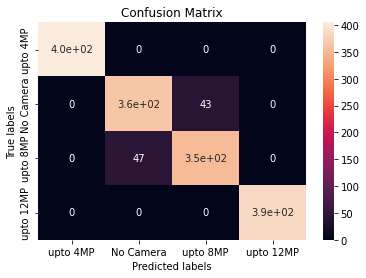

In [231]:
# Get the confusion matrix for both train and test

cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [232]:
train_cm

array([[405,   0,   0,   0],
       [  0, 365,  43,   0],
       [  0,  47, 354,   0],
       [  0,   0,   0, 386]])

In [233]:
test_cm

array([[ 95,   0,   0,   0],
       [  0,  78,  14,   0],
       [  0,  11,  88,   0],
       [  0,   0,   0, 114]])

In [234]:
# Get the roc_auc score for train and test dataset
trn_roc_auc = roc_auc_score(y_train,train_preds,multi_class='ovr')
test_roc_auc = roc_auc_score(y_test,test_preds,multi_class='ovr')

In [235]:
trn_roc_auc

0.9924957997590228

In [236]:
test_roc_auc

0.9906327557679934

# K Nearest Neighbours

In [267]:
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [269]:
# Creating object and fitting the model
knnc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knnc.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
#Predicting the test set result  
y_pred_train = knnc.predict_proba(X_train)
y_pred_test= knnc.predict_proba(X_test)  

In [287]:
y_pred_train

array([[0.6, 0.2, 0. , 0.2],
       [0. , 0.4, 0.4, 0.2],
       [0. , 0.4, 0.2, 0.4],
       ...,
       [0. , 0. , 0.4, 0.6],
       [0.4, 0.4, 0.2, 0. ],
       [0.4, 0.4, 0.2, 0. ]])

In [288]:
y_pred_test

array([[0.4, 0. , 0.6, 0. ],
       [0.2, 0. , 0.8, 0. ],
       [0. , 0.2, 0.2, 0.6],
       ...,
       [0.2, 0.6, 0.2, 0. ],
       [0.2, 0.2, 0. , 0.6],
       [0.2, 0.4, 0.4, 0. ]])

In [292]:
train_class_pred_knn = clf.predict(X_train)
test_class_pred_knn = clf.predict(X_test)

In [293]:
# Confusion Matrix for Train and Test
cm_train = confusion_matrix(y_train,train_class_pred_knn)
cm_test = confusion_matrix(y_test,test_class_pred_knn)

In [294]:
cm_train

array([[405,   0,   0,   0],
       [  0, 365,  43,   0],
       [  0,  47, 354,   0],
       [  0,   0,   0, 386]])

In [295]:
cm_test

array([[ 95,   0,   0,   0],
       [  0,  78,  14,   0],
       [  0,  11,  88,   0],
       [  0,   0,   0, 114]])

In [307]:
knn_train_acc = accuracy_score(y_train,train_class_pred_knn)
knn_test_acc = accuracy_score(y_test,test_class_pred_knn)

In [308]:
acc_train

0.94375

In [309]:
acc_test

0.9375

In [310]:
trn_roc_auc = roc_auc_score(y_train,y_pred_train,multi_class='ovr')
test_roc_auc = roc_auc_score(y_test,y_pred_test,multi_class='ovr')

In [311]:
trn_roc_auc

0.7892275442633641

In [312]:
test_roc_auc

0.531282765498539

# Random Forest Classifier

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [239]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [240]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [241]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [242]:
rf_optimal_model = rf_grid.best_estimator_

In [243]:
rf_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [313]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)
test_preds = rf_optimal_model.predict_proba(X_test)

In [314]:
len(train_preds)

1600

In [315]:
test_class_preds


array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 1, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [316]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.96125
The accuracy on test dataset is 0.9475


In [317]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [318]:
# Train Confusion Matrix
train_cm

array([[405,   0,   0,   0],
       [  0, 379,  29,   0],
       [  0,  33, 368,   0],
       [  0,   0,   0, 386]])

In [319]:
# Test Confusion Matrix
test_cm

array([[ 95,   0,   0,   0],
       [  0,  82,  10,   0],
       [  0,  11,  88,   0],
       [  0,   0,   0, 114]])

In [320]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds,multi_class='ovr')
test_auc = roc_auc_score(y_test,test_preds,multi_class='ovr')

In [321]:
# Train ROC_AUC score
train_auc

0.9979254418527288

In [322]:
# Test ROC_AUC score
test_auc

0.996084157879532

In [323]:
# Creating feature importance dataframe for RandomForestClassifier
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [324]:
importance_df.head()

,Feature,Feature Importance
0,front_cam_pix,0.003554
1,price_range,0.535670
2,four_g,0.000531
3,mobile_weight,0.003437
4,px_width,0.019058


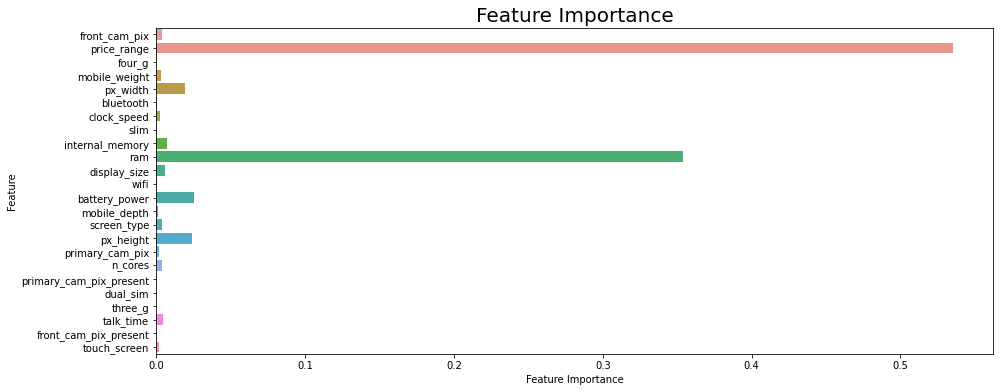

In [325]:
# Feature Importance plot
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Feature Importance',y="Feature", data=importance_df)
plt.show()